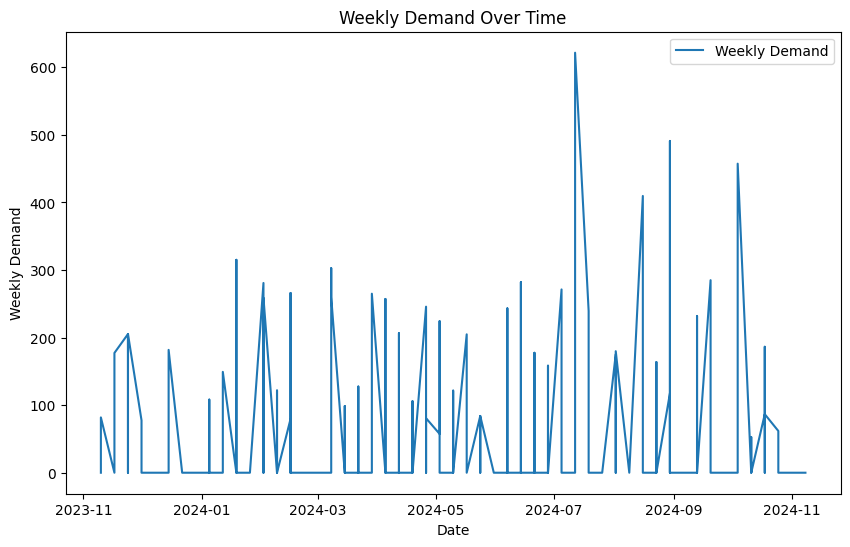

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



     Forecast Date  Forecasted Weekly Demand
1272    2024-11-17                 16.767558
1273    2024-11-24                 25.358232
1274    2024-12-01                 -6.091523
1275    2024-12-08                 22.717007
1276    2024-12-15                 -4.478161
1277    2024-12-22                 -4.986673
1278    2024-12-29                 -5.672172
1279    2025-01-05                 -4.979197
1280    2025-01-12                 38.259504
1281    2025-01-19                 88.109185


In [42]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

file_path = '/content/Kiddikind_final_data.xlsx'
excel_data = pd.ExcelFile(file_path)

weekly_demand_df = pd.read_excel(excel_data, sheet_name='Weekly Demand sheet')

weekly_demand_df['Week date'] = pd.to_datetime(weekly_demand_df['Week date'], format='%d-%m-%Y')

weekly_demand_df = weekly_demand_df.sort_values('Week date')
weekly_demand_df.set_index('Week date', inplace=True)

weekly_demand_series = weekly_demand_df['Weeks demand']

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(weekly_demand_series, label='Weekly Demand')
plt.title('Weekly Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Demand')
plt.legend()
plt.show()

sarima_model = SARIMAX(weekly_demand_series,
                       order=(5, 1, 0),
                       seasonal_order=(1, 1, 0, 52),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

fitted_sarima_model = sarima_model.fit(disp=False)

forecast_steps = 10
forecast_values = fitted_sarima_model.forecast(steps=forecast_steps)

forecast_dates = pd.date_range(weekly_demand_series.index[-1], periods=forecast_steps+1, freq='W')[1:]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=weekly_demand_series.index,
    y=weekly_demand_series,
    mode='lines',
    name='Historical Data'
))

fig.add_trace(go.Scatter(
    x=forecast_dates,
    y=forecast_values,
    mode='lines+markers',
    name='Forecasted Data',
    line=dict(color='red')
))

fig.update_layout(
    title='SARIMA Forecast for Weekly Demand',
    xaxis_title='Date',
    yaxis_title='Weekly Demand',
    legend_title="Data",
    template="plotly_dark"
)

fig.show()

forecast_results = pd.DataFrame({
    'Forecast Date': forecast_dates,
    'Forecasted Weekly Demand': forecast_values
})
print(forecast_results)

Accuracy of the model: 91.30%


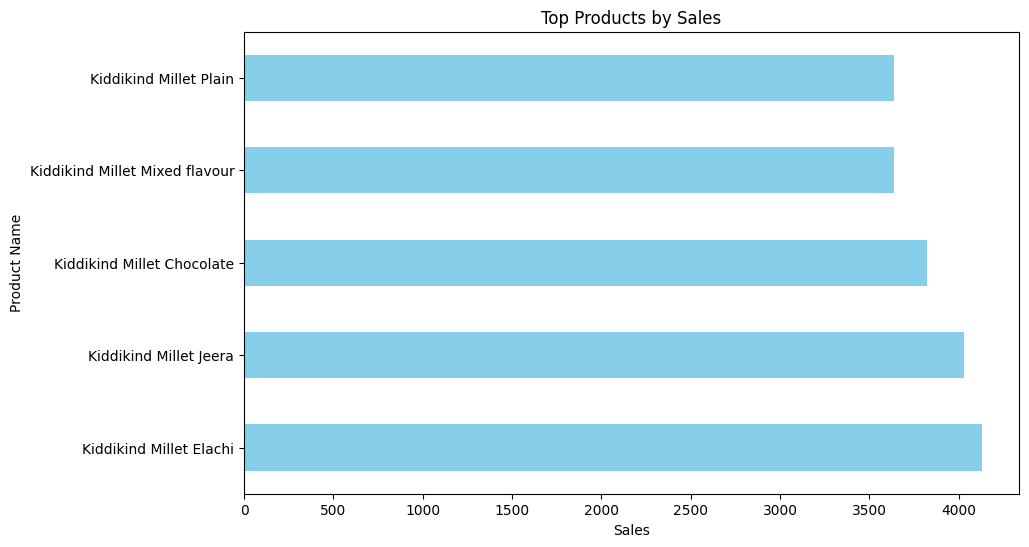

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

file_path = '/content/Kiddikind_final_data.xlsx'
excel_data = pd.ExcelFile(file_path)

products_df = pd.read_excel(excel_data, sheet_name='Products')

products_df['Week date'] = pd.to_datetime(products_df['date'], format='%d-%m-%Y')

products_df['Year'] = products_df['Week date'].dt.year
products_df['Month'] = products_df['Week date'].dt.month
products_df['Week'] = products_df['Week date'].dt.isocalendar().week

encoder = LabelEncoder()
products_df['Product Name Encoded'] = encoder.fit_transform(products_df['product_name'])

features = ['price', 'units_produced', 'marketing_expense', 'Annual Revenue', 'Year', 'Month', 'Week', 'Product Name Encoded']

products_df['Sales Category'] = pd.qcut(products_df['sales_volume'], q=3, labels=['Low', 'Medium', 'High'])

target = 'Sales Category'

available_columns = products_df.columns
features = [col for col in features if col in available_columns]

X = products_df[features]
y = products_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

sales_by_product = products_df.groupby('product_name')['sales_volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sales_by_product.head(10).plot(kind='barh', color='skyblue')
plt.title('Top Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

Accuracy of the model: 95.65%


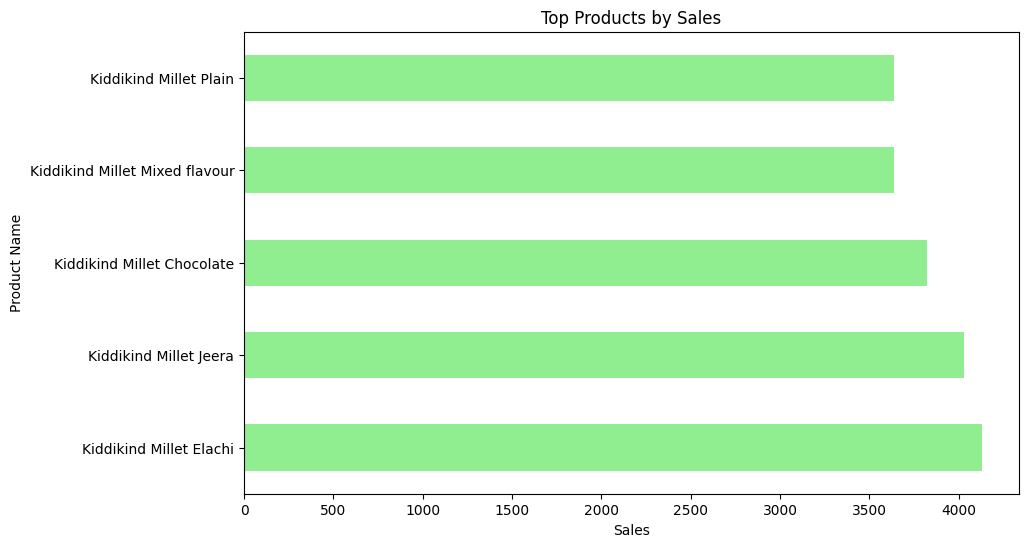

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

file_path = '/content/Kiddikind_final_data.xlsx'
excel_data = pd.ExcelFile(file_path)

products_df = pd.read_excel(excel_data, sheet_name='Products')

products_df['Week date'] = pd.to_datetime(products_df['date'], format='%d-%m-%Y')

products_df['Year'] = products_df['Week date'].dt.year
products_df['Month'] = products_df['Week date'].dt.month
products_df['Week'] = products_df['Week date'].dt.isocalendar().week

encoder = LabelEncoder()
products_df['Product Name Encoded'] = encoder.fit_transform(products_df['product_name'])

features = ['price', 'units_produced', 'marketing_expense', 'Annual Revenue', 'Year', 'Month', 'Week', 'Product Name Encoded']

products_df['Sales Category'] = pd.qcut(products_df['sales_volume'], q=3, labels=['Low', 'Medium', 'High'])

target = 'Sales Category'

available_columns = products_df.columns
features = [col for col in features if col in available_columns]

X = products_df[features]
y = products_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

sales_by_product = products_df.groupby('product_name')['sales_volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sales_by_product.head(10).plot(kind='barh', color='lightgreen')
plt.title('Top Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available.

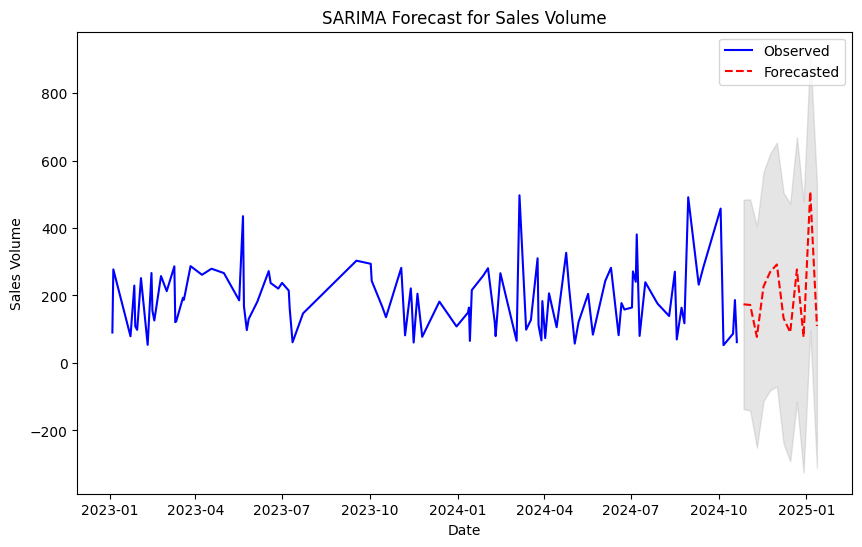

Accuracy of the hybrid model (SARIMA + RandomForest): 91.30%


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

file_path = '/content/Kiddikind_final_data.xlsx'
excel_data = pd.ExcelFile(file_path)

products_df = pd.read_excel(excel_data, sheet_name='Products')

products_df['Week date'] = pd.to_datetime(products_df['date'], format='%d-%m-%Y')
products_df['Year'] = products_df['Week date'].dt.year
products_df['Month'] = products_df['Week date'].dt.month
products_df['Week'] = products_df['Week date'].dt.isocalendar().week

encoder = LabelEncoder()
products_df['Product Name Encoded'] = encoder.fit_transform(products_df['product_name'])

sales_data = products_df.groupby('Week date')['sales_volume'].sum()

sarima_model = SARIMAX(sales_data,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 52),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit(disp=False)

forecast_steps = 12
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

forecast_index = pd.date_range(sales_data.index[-1], periods=forecast_steps+1, freq='W')[1:]

plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data, label='Observed', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecasted', color='red', linestyle='--')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2)
plt.title('SARIMA Forecast for Sales Volume')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

products_df['forecasted_sales'] = forecast_mean.iloc[-1]

products_df['Sales Category'] = pd.qcut(products_df['sales_volume'], q=3, labels=['Low', 'Medium', 'High'])

features = ['price', 'units_produced', 'marketing_expense', 'Annual Revenue', 'Year', 'Month', 'Week', 'Product Name Encoded', 'forecasted_sales']
target = 'Sales Category'

X = products_df[features]
y = products_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the hybrid model (SARIMA + RandomForest): {accuracy * 100:.2f}%")